一、概念

真实模型：对于某一任务，收集到所有的数据，在该数据集上经验风险最小化，所得到的模型为真实模型，记作f，现实世界中无法得到f,只能尽量接近

偏差：用于评估一个模型本身的学习能力，给定相同规模、不同大小的n个数据集，训练出n个模型，n个模型分别对一个测试数据进行预测，得到的结果取平均，该平均值与f(x)（真实的标签）之间的差距称为偏差，定义如下：
$$
bias = E(\hat f(x)) - f(x)
$$

方差：用于评估模型对于数据扰动的稳定性。给定相同规模、不同大小的n个数据集，训练出n个模型，n个模型分别对一个测试数据进行预测，得到的n个结果的离散程度称为方差，定义为：
$$
var = E(\hat f(x) - E(\hat f(x))^2
$$

图形化表示如下：
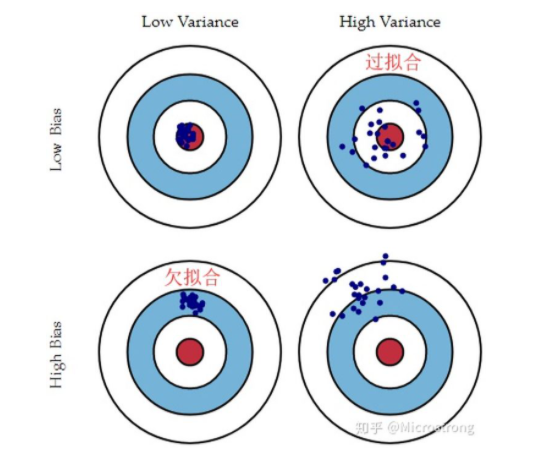

图中的每一个蓝点表示一个$\hat f(x)$，高偏差是指模型本身的学习能力不足，比如多项式回归中用较简单的模型，对数据的拟合能力不足，但此时一般方差较小，即换一个相同规模的数据集，模型本身的变化不大（原来是直线现在还是直线，只是旋转了一定的角度）；高方差是指对数据扰动的抵抗能力不足，对数据较敏感，如采用较高次的模型拟合数据，换一批数据，可能曲线发生较大变化，但此时一般偏差较小，即对数据的拟合能力较强。

二、偏差方差分解

真实数据集的标签记作y,则y与f(x)之间的差距为噪声，记作$y = f + \epsilon$，噪声与模型无关，再好对的模型也无法消除噪声，噪声决定了loss的下限，决定了问题本身的难度，设噪声的均值为0，方差为$\delta^2$（中心极限定理）

泛化误差可分解为偏差、方差、噪声三部分，推导如下：<br/>
$E((y-\hat f)^2) = E((f + \epsilon - \hat f)^2)=E[( f + \epsilon - \hat f + E(\hat f) - E(\hat f))^2]$<br/>
$= E[(f - E(\hat f))^2] + E(\epsilon^2) + E[(E(\hat f) - \hat f)^2] + 2E[(f - E(\hat f))\epsilon] + 2E[\epsilon(E(\hat f) - \hat f)] + 2E[(f - E(\hat f))(E(\hat f) - \hat f)]$<br/>
$由于f与E(\hat f)均可视为常数，因此E[(f - E(\hat f))^2] = (f - E(\hat f))^2$<br/>
$E(\epsilon^2) = var(\epsilon) + [E(\epsilon)]^2 = var(\epsilon) = \delta^2$<br/>
$由于f与E(\hat f)均可视为常数，因此 E[(f - E(\hat f))\epsilon] = (f - E(\hat f))E(\epsilon) = 0 $<br/>
$由于噪声与模型无关，因此\epsilon与E(\hat f) - \hat f相互独立，因此E[\epsilon(E(\hat f) - \hat f)] = E(\epsilon)E[(E(\hat f) - \hat f)] = 0（E(\epsilon)与E[(E(\hat f) - \hat f)]均等于0）$<br/>
$由于f与E(\hat f)均可视为常数,因此E[(f - E(\hat f))(E(\hat f) - \hat f)] = (f - E(\hat f))E[E(\hat f) - \hat f] ,E[E(\hat f) - \hat f]为0（数据与他们的均值之间的差值的均值等于0，\\举例：2,6,5,3,1,均值为3.4，差值分别为-1.4,2.6,1.6,-0.4,-2.4，则差值的均值为0）$

$则E((y-\hat f)^2) = (f - E(\hat f))^2 + \delta^2 + E[(E(\hat f) - \hat f)^2]$<br/>
$=bias(\hat f)^2 + \delta^2 + var(\hat f)$

三、其它

bias-variance-tradeoff:一般来讲高偏差对应低方差，高方差对应低方差，在实际应用时要对二者进行权衡，找到低方差与低偏差的那个点
<img src="1.jpg" alt="" width="50%" height="50%" align="center" />

与过拟合、欠拟合的关系：高偏差对应着欠拟合，一般来讲模型复杂度较低的时候出现；高方差对应着过拟合，一般来讲模型复杂度较高的时候出现

与k折交叉验证的关系：当k值较大时，训练数据较多，模型拟合的较好，对应着低偏差、高方差；当k值较小时，训练数据较少，模型拟合效果较差，对应着高偏差、低方差